## DSAP107

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.libqsturng as ssl
import statsmodels.stats.outliers_influence as sso
import math

### Summary Statistics

In [2]:
dsap107 = pd.read_excel('../../data/semester regression data/DSAP107.xlsx')
print('Head of dataset:')
display(dsap107.head())

print("Tail of dataset:")
display(dsap107.tail())

Head of dataset:


,student_id,midterm,final,total_watch_time,watch_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq,period 0,period 1,period 2,period 3,period 4,period 5,watched_video,avg_playback_rate
0,64,0,0.0,4385.133333,0.178199,0,0,0,0,0,0,0,0,0,10,2,12,1.494139
1,65,0,0.0,3572.000000,0.092675,88,5,442,9,4,4,0,0,0,0,1,5,1.000000
2,66,82,76.0,36625.000000,1.033947,6685,171,7912,248,22,36,0,7,6,0,3,52,1.000000
3,67,79,79.0,18789.383333,0.963616,6459,116,6784,161,6,3,3,9,33,1,1,50,1.847426
4,68,52,57.0,13719.766667,0.673371,3958,83,6892,171,35,2,0,3,29,8,0,42,1.742595


Tail of dataset:


,student_id,midterm,final,total_watch_time,watch_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq,period 0,period 1,period 2,period 3,period 4,period 5,watched_video,avg_playback_rate
100,164,0,88.0,28485.866667,1.089812,5858,597,5365,333,69,18,0,2,11,11,11,53,1.376542
101,165,0,55.0,6125.250000,0.271872,2409,51,4293,53,10,5,0,0,0,0,14,19,1.626709
102,166,90,76.0,18766.033333,0.684335,3950,343,2600,103,22,5,0,3,13,10,4,35,1.279866
103,167,91,54.0,17117.583333,0.743504,3384,59,2689,38,3,3,0,6,15,8,18,50,1.565057
104,168,74,58.0,28334.883333,1.474750,12529,417,6195,330,57,6,0,1,18,20,9,54,1.843805


In [3]:
#summary statistics
dsap107.describe()

,student_id,midterm,final,total_watch_time,watch_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq,period 0,period 1,period 2,period 3,period 4,period 5,watched_video,avg_playback_rate
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,116.000000,47.838095,47.890476,18448.892653,0.785379,6054.847619,158.180952,5610.466667,226.752381,25.142857,6.676190,0.285714,4.228571,11.752381,8.133333,7.419048,38.495238,1.436466
std,30.454885,41.221989,34.290121,12551.036095,0.513799,8198.316073,190.969378,7765.358963,395.222546,46.545352,8.295614,1.149534,5.893701,9.441908,6.967047,7.341637,19.737276,0.458358
min,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,0.000000,0.000000,9828.645238,0.466868,702.000000,26.000000,753.000000,13.000000,2.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,27.000000,1.248772
50%,116.000000,73.000000,60.000000,18766.033333,0.793550,3835.000000,68.000000,2600.000000,71.000000,9.000000,4.000000,0.000000,1.000000,11.000000,7.000000,5.000000,50.000000,1.480752
75%,142.000000,85.000000,76.000000,26227.966667,1.081602,8914.000000,242.000000,6892.000000,285.000000,27.000000,10.000000,0.000000,7.000000,18.000000,13.000000,13.000000,53.000000,1.765592
max,168.000000,98.000000,91.500000,69769.233333,2.687745,46751.000000,869.000000,46246.000000,2353.000000,359.000000,36.000000,8.000000,24.000000,38.000000,26.000000,31.000000,54.000000,2.380491


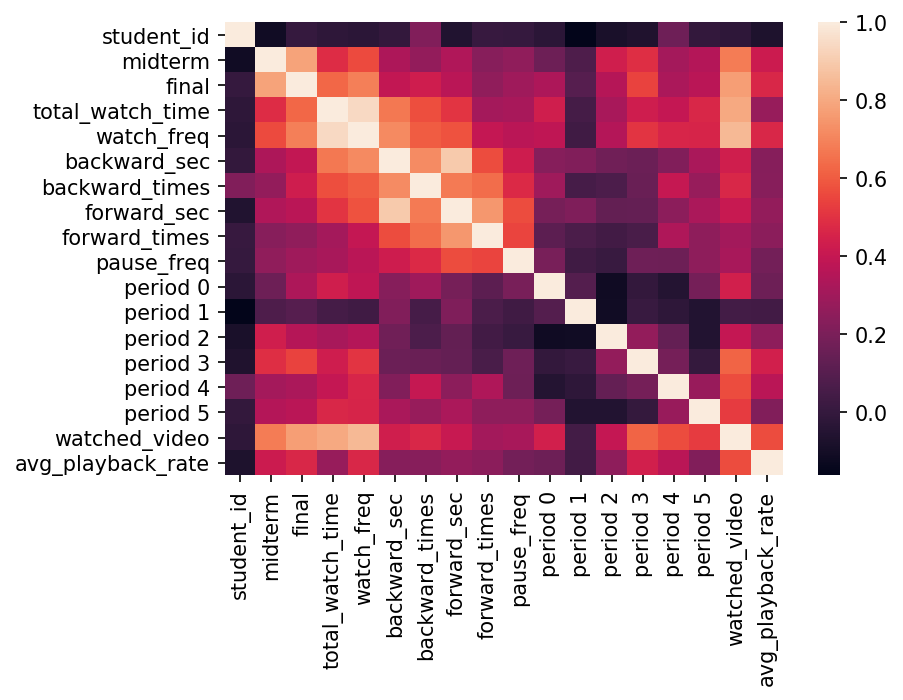

In [6]:
corr = dsap107.corr()
_ = sns.heatmap(corr, annot=False)

### Scatter Diagram

#### Midterm

In [13]:
xnames.drop(['student_id', 'midterm'])

Index(['final', 'total_watch_time', 'watch_freq', 'backward_sec',
       'backward_times', 'forward_sec', 'forward_times', 'pause_freq',
       'period 0', 'period 1', 'period 2', 'period 3', 'period 4', 'period 5',
       'watched_video', 'avg_playback_rate'],
      dtype='object')

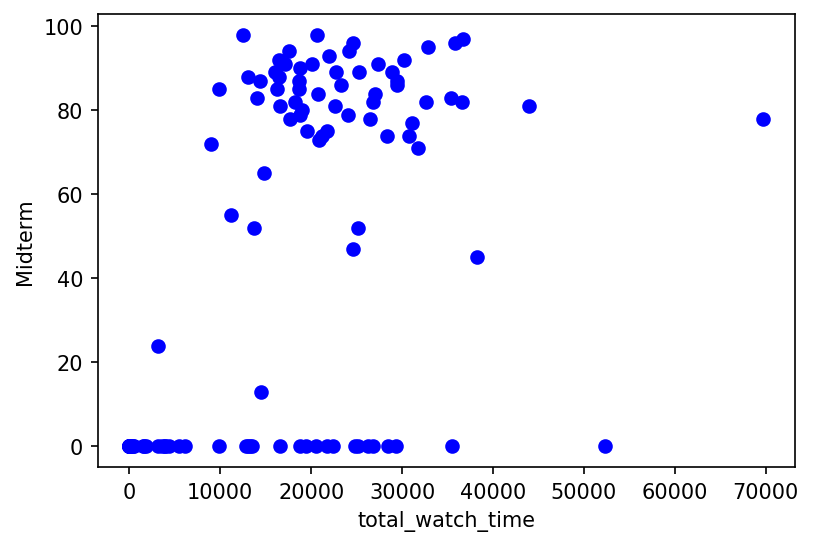

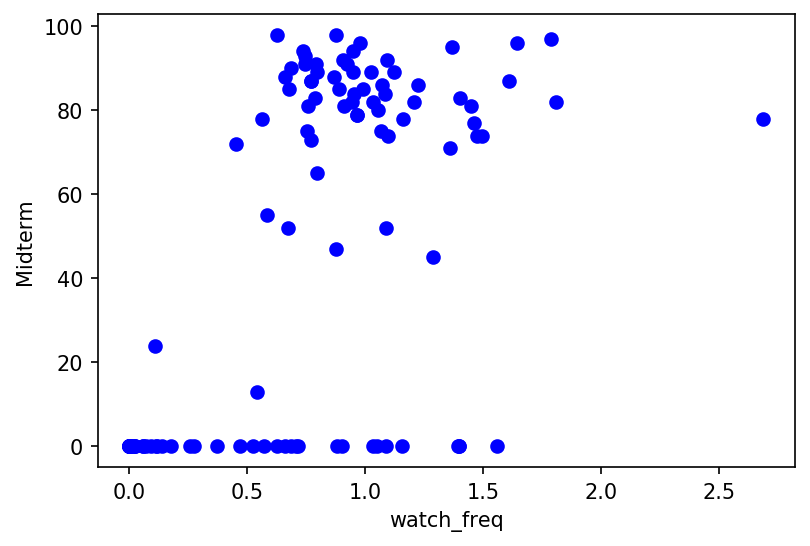

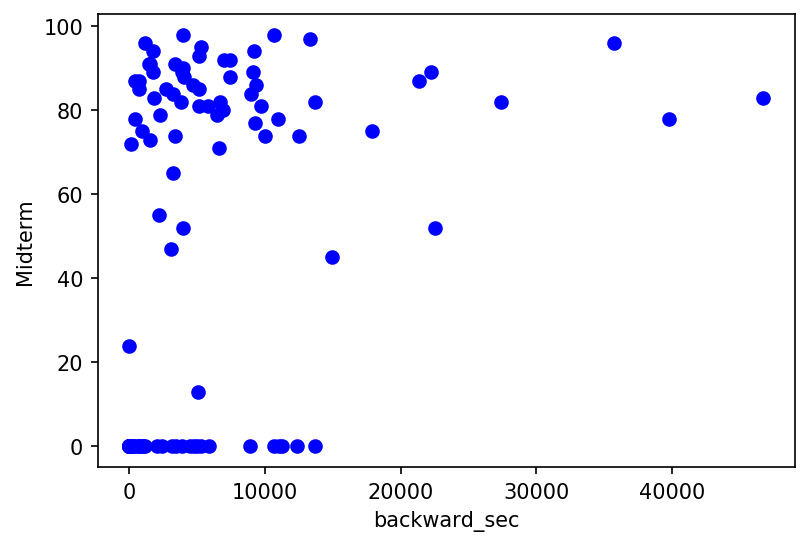

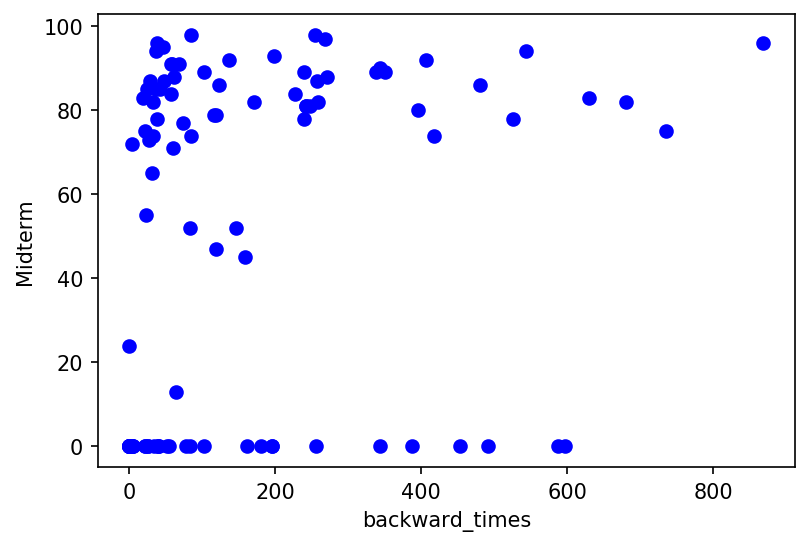

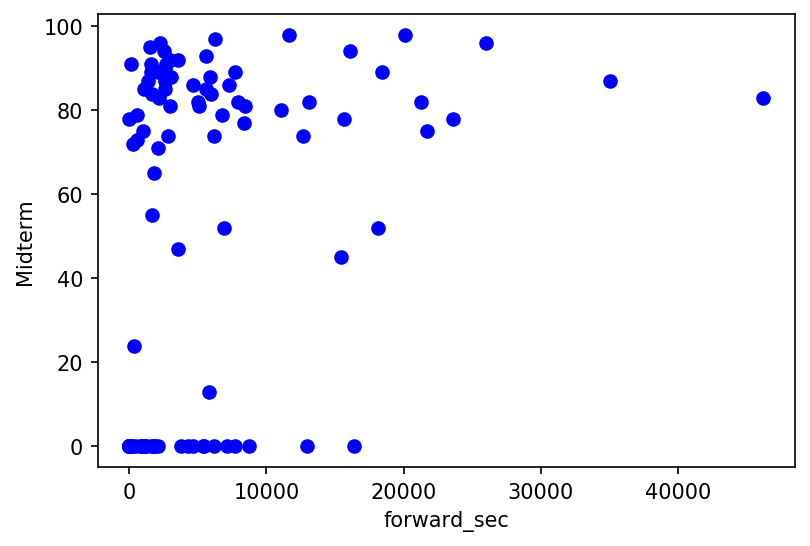

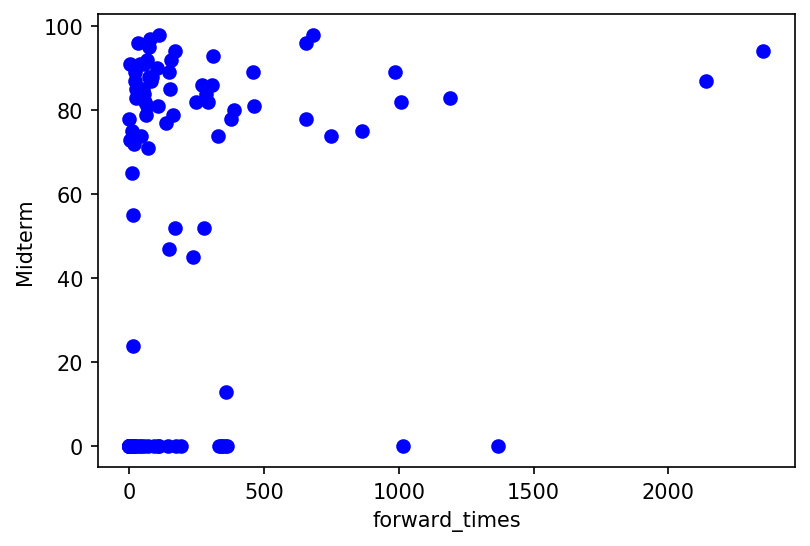

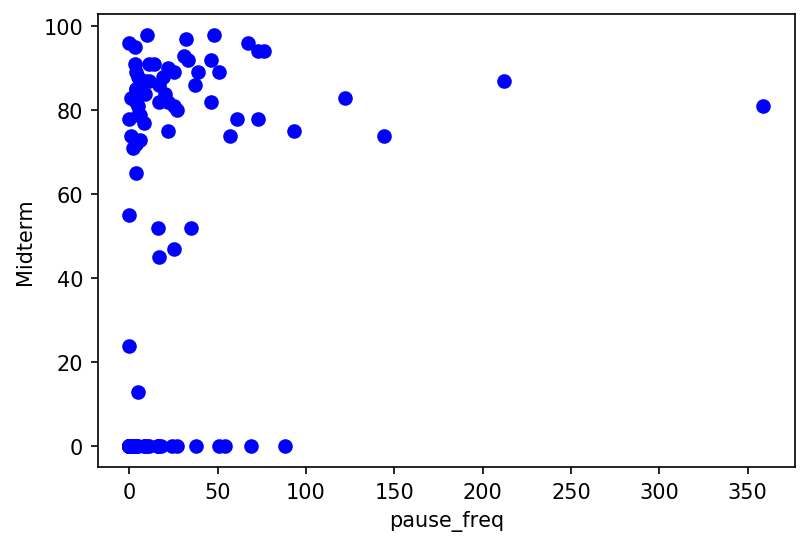

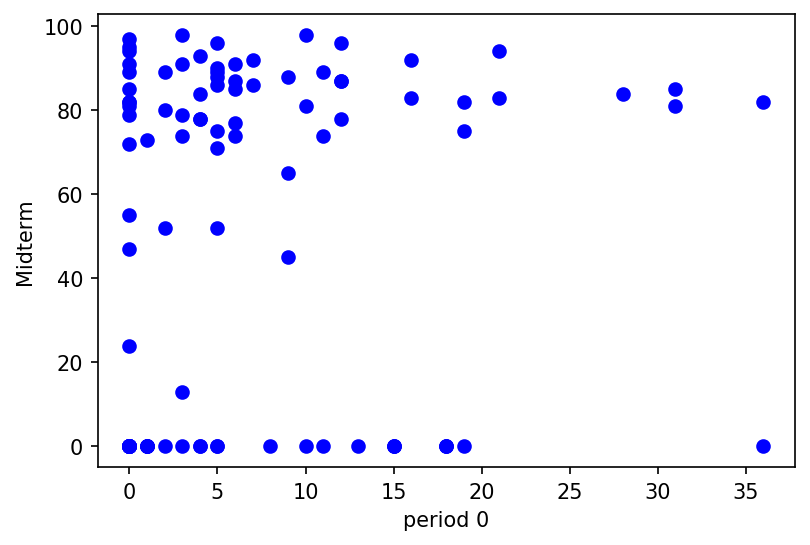

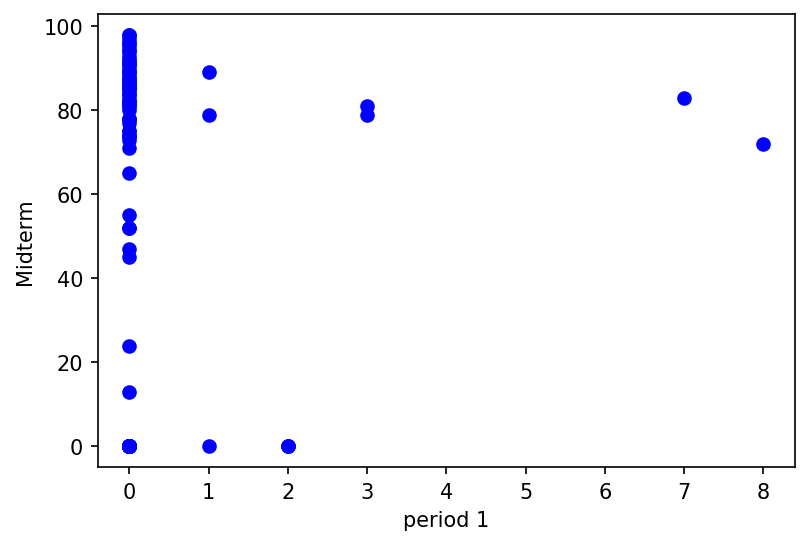

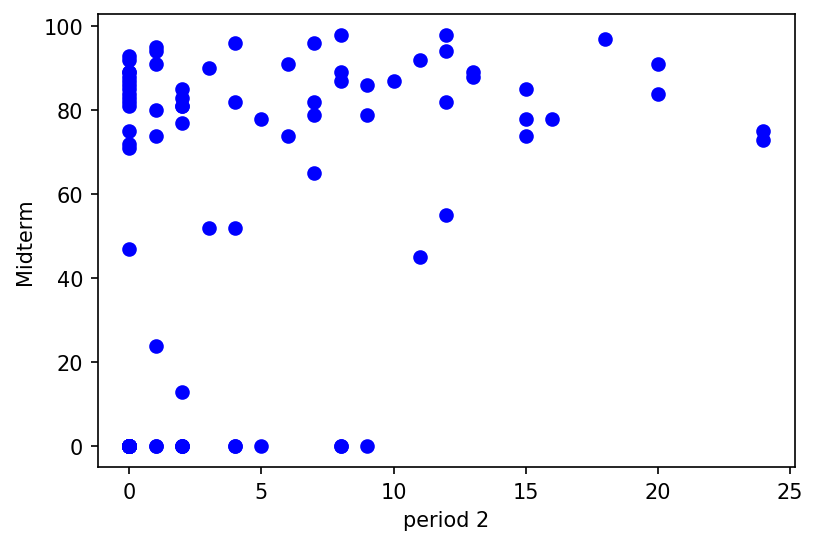

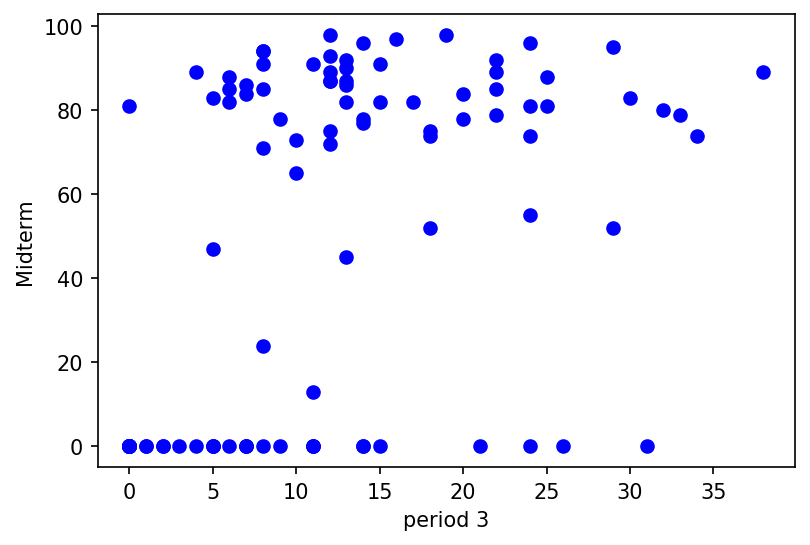

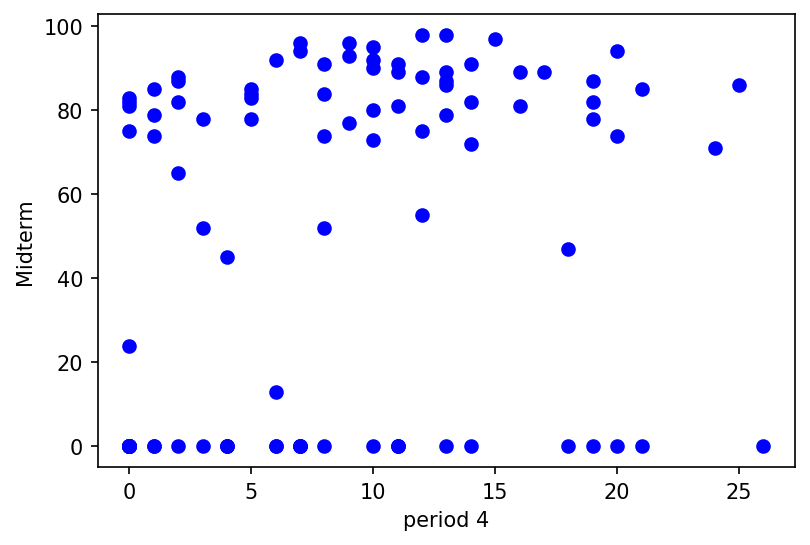

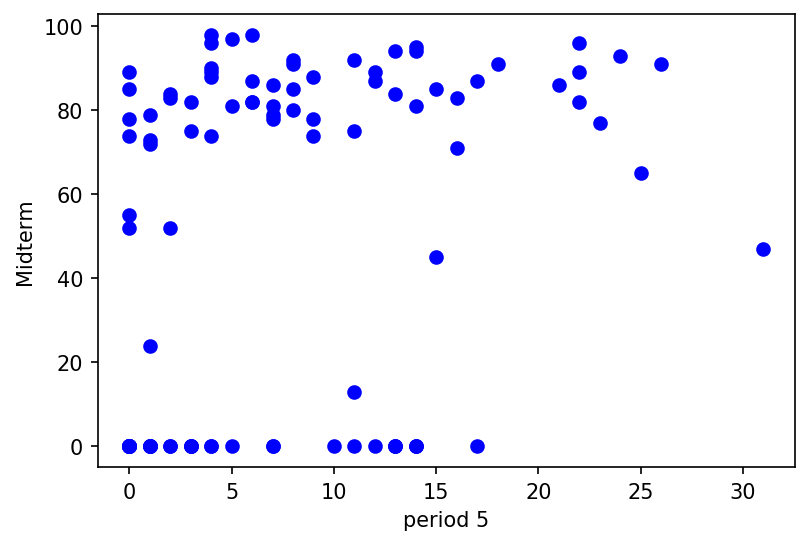

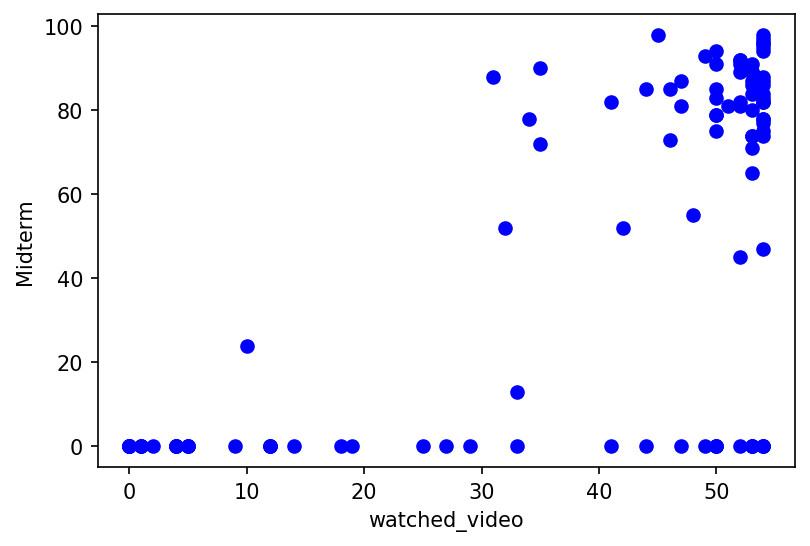

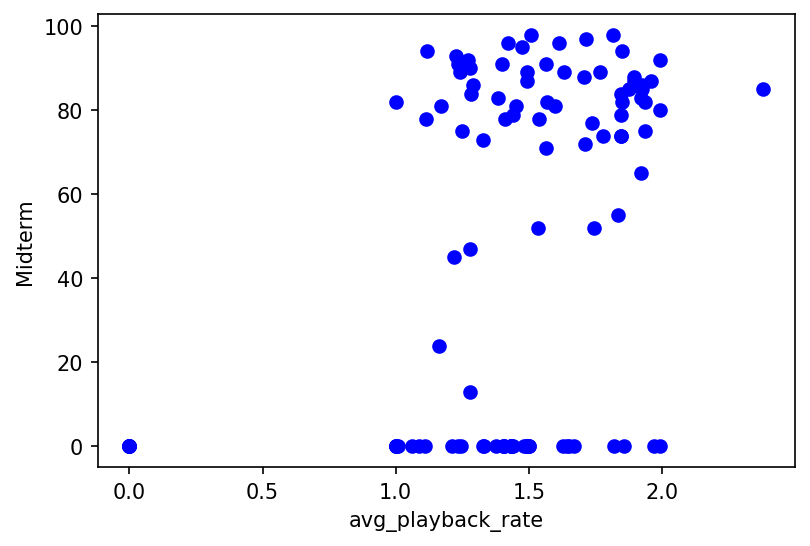

In [15]:
y = dsap107['midterm'].values
xnames = dsap107.columns.drop(['midterm', 'student_id', 'final'])
for aname in xnames:
    x = dsap107[aname].values

    _ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Midterm')
    plt.show()